<a href="https://colab.research.google.com/github/andresRah/NLP_KeepCoding/blob/main/4)_Reporte_de_m%C3%A9tricas_y_conclusiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Práctica NLP
**Punto #4**

Reporte de métricas y conclusiones

El alumno, tomando como referencia los resultados del modelo escogido en el ejercicio 3, calculará las métricas que permitan validar la bondad del modelo. También incluirá comentarios y las conclusiones finales.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score


In [4]:
# Cargar el archivo preds.csv - resultado de la evaluación del modelo
file_path_preds = 'preds.csv'
df_preds = pd.read_csv(file_path_preds)

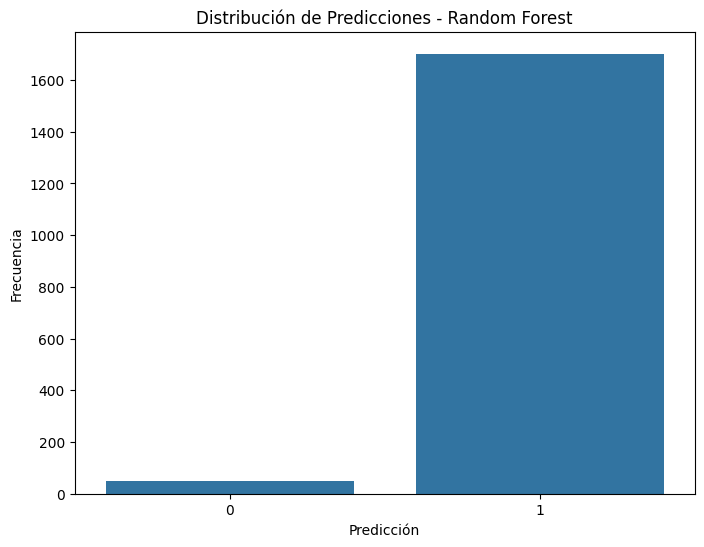

In [5]:
# Visualización de la distribución de predicciones
plt.figure(figsize=(8, 6))
sns.countplot(x='y_pred_test_random_forest', data=df_preds)
plt.title('Distribución de Predicciones - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.show()

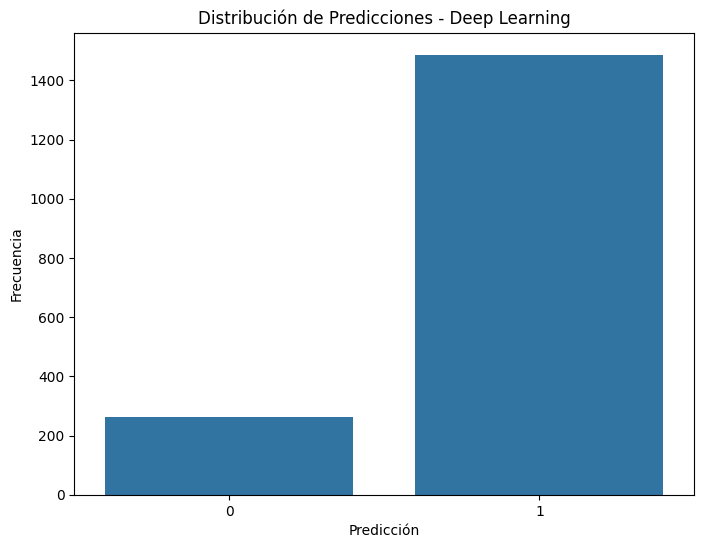

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y_pred_test_deep', data=df_preds)
plt.title('Distribución de Predicciones - Deep Learning')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.show()

Efectivamente podemos concluir que el modelo presenta un desbalance en los datos de entrenamiento al ser mayormente predominante las reviews positivas que las negativas, esto lo evidenciamos también en el punto anterior - Modelo de análisis de sentimiento.

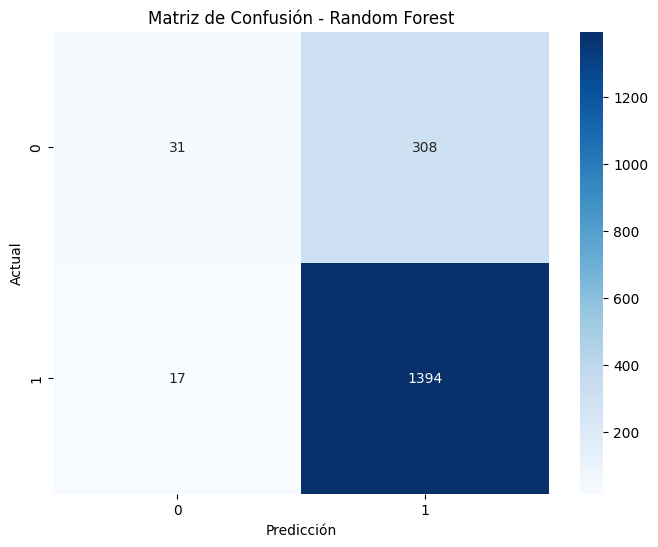

In [7]:
# Matriz de confusión para Random Forest
conf_matrix_rf = confusion_matrix(df_preds['y_actual'], df_preds['y_pred_test_random_forest'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

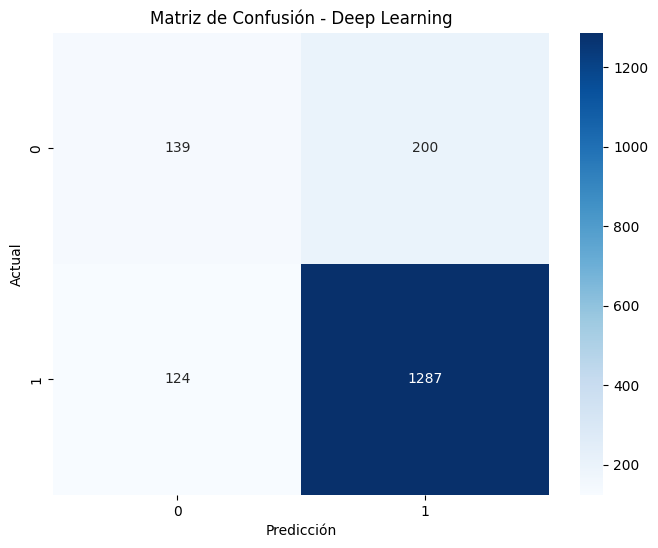

In [8]:
# Matriz de confusión para Deep Learning
conf_matrix_deep = confusion_matrix(df_preds['y_actual'], df_preds['y_pred_test_deep'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_deep, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Deep Learning')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

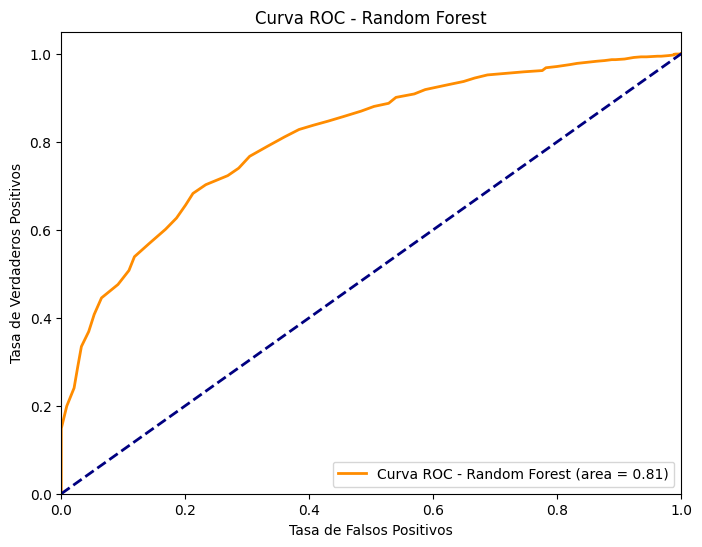

In [9]:
# Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(df_preds['y_actual'], df_preds['y_pred_proba_test_random_forest'])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC - Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

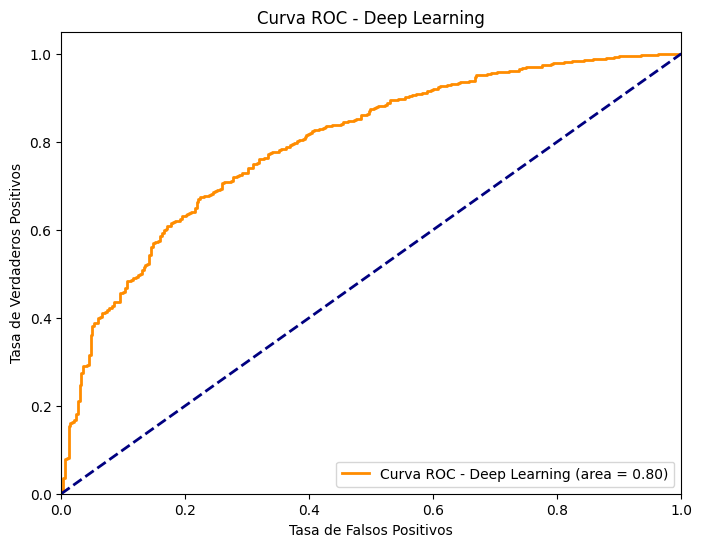

In [10]:
# Curva ROC y AUC para Deep Learning
fpr_deep, tpr_deep, _ = roc_curve(df_preds['y_actual'], df_preds['y_pred_proba_test_deep'])
roc_auc_deep = auc(fpr_deep, tpr_deep)
plt.figure(figsize=(8, 6))
plt.plot(fpr_deep, tpr_deep, color='darkorange', lw=2, label='Curva ROC - Deep Learning (area = %0.2f)' % roc_auc_deep)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Deep Learning')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Calcular las métricas adicionales para Random Forest
print("Reporte de clasificación para Random Forest:")
print(classification_report(df_preds['y_actual'], df_preds['y_pred_test_random_forest']))
accuracy_rf = accuracy_score(df_preds['y_actual'], df_preds['y_pred_test_random_forest'])
precision_rf = precision_score(df_preds['y_actual'], df_preds['y_pred_test_random_forest'])
recall_rf = recall_score(df_preds['y_actual'], df_preds['y_pred_test_random_forest'])
f1_score_rf = f1_score(df_preds['y_actual'], df_preds['y_pred_test_random_forest'])

print(f"Random Forest - Precisión: {accuracy_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")
print(f"Random Forest - F1-Score: {f1_score_rf:.2f}")

print("\nReporte de clasificación para Deep Learning:")
print(classification_report(df_preds['y_actual'], df_preds['y_pred_test_deep']))
# Calcular las métricas adicionales para Deep Learning
accuracy_deep = accuracy_score(df_preds['y_actual'], df_preds['y_pred_test_deep'])
precision_deep = precision_score(df_preds['y_actual'], df_preds['y_pred_test_deep'])
recall_deep = recall_score(df_preds['y_actual'], df_preds['y_pred_test_deep'])
f1_score_deep = f1_score(df_preds['y_actual'], df_preds['y_pred_test_deep'])

print(f"Deep Learning - Precisión: {accuracy_deep:.2f}")
print(f"Deep Learning - Precision: {precision_deep:.2f}")
print(f"Deep Learning - Recall: {recall_deep:.2f}")
print(f"Deep Learning - F1-Score: {f1_score_deep:.2f}")

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.09      0.16       339
           1       0.82      0.99      0.90      1411

    accuracy                           0.81      1750
   macro avg       0.73      0.54      0.53      1750
weighted avg       0.79      0.81      0.75      1750

Random Forest - Precisión: 0.81
Random Forest - Precision: 0.82
Random Forest - Recall: 0.99
Random Forest - F1-Score: 0.90

Reporte de clasificación para Deep Learning:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       339
           1       0.87      0.91      0.89      1411

    accuracy                           0.81      1750
   macro avg       0.70      0.66      0.67      1750
weighted avg       0.80      0.81      0.81      1750

Deep Learning - Precisión: 0.81
Deep Learning - Precision: 0.87
Deep Learning - Recall: 0.91
Deep Learning - F1-Score: 0.89


## Conclusiones

- Ambos modelos muestran un buen rendimiento general, pero el modelo de Deep Learning parece manejar mejor el desbalance de clases, lo que se refleja en un mejor equilibrio entre precisión, recall y F1-Score.

- **Precisión Global:** El modelo de Deep Learning fue similar a la de Random Forest
- **Precisión, Recall y F1-Score:** El modelo de Deep Learning tuvo Mejor equilibrio entre las métricas en comparación con Random Forest.
- **Curva ROC AUC:** Ambas curvas fueron muy similares

- El modelo Deep Learning maneja mejor la clase minoritaria o reviews negativas y tiene un rendimiento más equilibrado.

Respecto a las matrices de confusión

## **Random Forest:**

**Verdaderos Negativos (TN):** 31

**Falsos Positivos (FP):** 308

**Falsos Negativos (FN):** 17

**Verdaderos Positivos (TP):** 1394

### **Observaciones:**

El modelo Random Forest tiene un alto número de falsos positivos (308), lo que significa que predice incorrectamente muchas instancias de la clase 0 como 1.

Tiene pocos falsos negativos (17), lo que indica que identifica correctamente la mayoría de las instancias de la clase 1 como pudimos identificar en el análisis anterior.

## **Deep Learning:**

**Verdaderos Negativos (TN):** 139

**Falsos Positivos (FP):** 200

**Falsos Negativos (FN):** 124

**Verdaderos Positivos (TP):** 1287

### **Observaciones:**

El modelo Deep Learning tiene una menor cantidad de falsos positivos (200) en comparación con Random Forest, lo que indica una mejor capacidad para identificar correctamente las instancias de la clase 0 o reviews negativas.

Sin embargo, tiene más falsos negativos (124) que Random Forest, lo que significa que pierde más instancias de la clase 1 o reviews positivas.

| **Método**       | **Pros**                                                                                                    | **Contras**                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|
| **Random Forest**| - Alta capacidad para identificar la clase 1 (1394 verdaderos positivos).                                   | - Alta cantidad de falsos positivos (308), lo que indica problemas para identificar correctamente la clase 0. |
|                  | - Muy pocos falsos negativos (17).                                                                          |                                                                                                   |
| **Deep Learning**| - Mejor capacidad para identificar correctamente la clase 0 (139 verdaderos negativos vs. 31 en Random Forest). | - Más falsos negativos (124) que Random Forest, lo que significa que algunas instancias de la clase 1 no se identifican correctamente. |
|                  | - Menor cantidad de falsos positivos (200) en comparación con Random Forest.                                |                                                                                                   |


## Conclusión Final

- Ambos modelos deben balancearse en sus clases para mejorar el rendimineto

- Si buscamos minimizar los falsos positivos y tener una mejor identificación de la clase 0 o reviews negativas, el modelo de Deep Learning es más adecuado.

- Si por el contrario la prioridad es minimizar los falsos negativos y tener mayor seguridad de que la mayoria de las instancias de la clase 1 o reviews positivas se identifiquen correctamente, el modelo de Random Forest es el más adecuado.